## Multithreading 
Main goal of multithreading is to save the time to execute code 

by using multiple threads

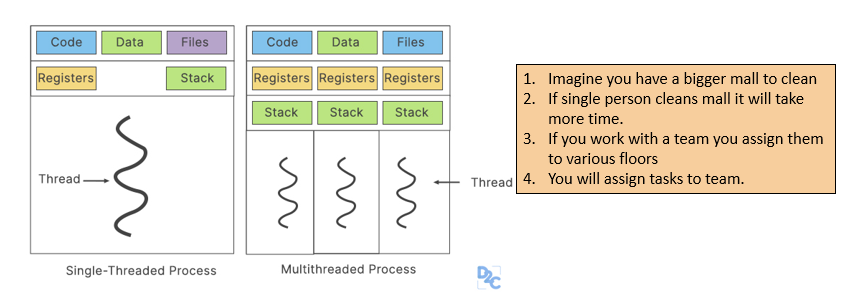

In [1]:
import time

In [4]:
time.sleep(3)
print("Hi all")

Hi all


In [3]:
%%time
time.sleep(4)
print("Example")

Example
CPU times: total: 0 ns
Wall time: 4 s


In [25]:
def hypotenuse(a, b):
    print("hypotenuse function started")
    time.sleep(3)
    h = (a**2 + b**2)**(1/2)
    print(f"hypotenuse for {a} and {b} is {h:.4f}")
    return h

In [26]:
hypotenuse(3, 4)

hypotenuse function started
hypotenuse for 3 and 4 is 5.0000


5.0

In [27]:
%%time
hypotenuse(4, 5)

hypotenuse function started
hypotenuse for 4 and 5 is 6.4031
CPU times: total: 15.6 ms
Wall time: 3 s


6.4031242374328485

In [28]:
def simple_intrest(P, N, R):
    print(f"Simple Intrest function started")
    time.sleep(2)
    I = (P*N*R)/100
    print(f"P = {P}, N = {N}, R = {R}, I = {I}")
    return I

In [29]:
I = simple_intrest(P=50000, N=4, R=7.1)
print(I)

Simple Intrest function started
P = 50000, N = 4, R = 7.1, I = 14200.0
14200.0


In [30]:
%%time
I2 = simple_intrest(P=30000, N=3, R=6.5)
print(I2)

Simple Intrest function started
P = 30000, N = 3, R = 6.5, I = 5850.0
5850.0
CPU times: total: 0 ns
Wall time: 2 s


In [31]:
%%time
h1 = hypotenuse(4, 5) # 3seconds
print(h1) 
s1 = simple_intrest(P=30000, N=3, R=6.5) # 2seconds  
print(s1)

hypotenuse function started
hypotenuse for 4 and 5 is 6.4031
6.4031242374328485
Simple Intrest function started
P = 30000, N = 3, R = 6.5, I = 5850.0
5850.0
CPU times: total: 0 ns
Wall time: 5.01 s


### Single thread code always exceutes in a sequence

### Multithreading for differnt functions

In [22]:
from threading import Thread

In [32]:
%%time
# Create the threads
th1 = Thread(target=hypotenuse, args=(3, 4))
th2 = Thread(target=simple_intrest, args=(50000, 4, 7))

# Start all the threads
th1.start()
th2.start()

# Wait for all threads to finish
th1.join()
th2.join()

hypotenuse function startedSimple Intrest function started

P = 50000, N = 4, R = 7, I = 14000.0
hypotenuse for 3 and 4 is 5.0000
CPU times: total: 0 ns
Wall time: 3.01 s


### Multithreading for single function but multipe values

In [35]:
def square(n):
    time.sleep(3)
    s = n**2
    print(f"Square of given number {n} is {s}")
    return s

In [36]:
square(5)

Square of given number 5 is 25


25

In [38]:
%%time
square(1.4)

Square of given number 1.4 is 1.9599999999999997
CPU times: total: 0 ns
Wall time: 3 s


1.9599999999999997

In [37]:
nums = [2, 3, 4, 5, 7, 11]
nums

[2, 3, 4, 5, 7, 11]

In [39]:
len(nums)

6

In [40]:
3*len(nums)

18

In [41]:
%%time
for i in nums:
    square(i)

Square of given number 2 is 4
Square of given number 3 is 9
Square of given number 4 is 16
Square of given number 5 is 25
Square of given number 7 is 49
Square of given number 11 is 121
CPU times: total: 31.2 ms
Wall time: 18 s


### multithreading provide thread for each number in list

In [42]:
nums

[2, 3, 4, 5, 7, 11]

In [45]:
%%time
# Create a thread for each number
threads = []
for i in nums:
    th = Thread(target=square, args=(i,))
    th.start()
    threads.append(th)

# Wait for all threads to finish
for th in threads:
    th.join()

Square of given number 2 is 4Square of given number 5 is 25
Square of given number 11 is 121
Square of given number 7 is 49
Square of given number 4 is 16
Square of given number 3 is 9

CPU times: total: 31.2 ms
Wall time: 3.01 s


In [48]:
url1 = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv


In [49]:
url1.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'main',
 'artifacts',
 'data.csv']

In [50]:
url1.split("/")[-1]

'data.csv'

In [47]:
from urllib.request import urlretrieve

In [51]:
def download(url):
    file_name = url.split("/")[-1]
    print(f"Downloading {file_name} ...")
    urlretrieve(url, file_name)
    print(f"{file_name} Download Complete")

In [52]:
url1

'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv'

In [53]:
download(url1)

data.csv Download Complete


In [54]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv"
]

In [55]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [56]:
%%time
for i in urls:
    download(i)

data.csv Download Complete
test.csv Download Complete
train.csv Download Complete
CPU times: total: 125 ms
Wall time: 3.73 s


In [58]:
%%time
# Create and start all threads
threads = []
for i in urls:
    th = Thread(target=download, args=(i,))
    th.start()
    threads.append(th)

# Wait for all threads to finish
for th in threads:
    th.join()

data.csv Download Complete
train.csv Download Complete
test.csv Download Complete
CPU times: total: 344 ms
Wall time: 1.3 s
